In [1]:
# Importing the Required Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('BikeSharingData.csv')

In [3]:
# Check the head of the data frame
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02/01/2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03/01/2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04/01/2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05/01/2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Check the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- __Since it is clear from the above information that there are no null values so there is no need to check for the Null values__

## Treatment of the Data

- __Convert the season column into Categorical column__

    -  season :
        - 1:spring 
        - 2:summer 
        - 3:fall
        - 4:winter

In [5]:
df['season'] = df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [6]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2018,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02/01/2018,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03/01/2018,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04/01/2018,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05/01/2018,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


__Mapping the weathersit column with the respective values (converting it into categorical)__
- weathersit : 
		- 1: Partly cloudy
		- 2: Mist + Cloudy
		- 3: Light Rain
		- 4: Heavy Rain

In [7]:
df['weathersit'] = df['weathersit'].map({1:'Partly cloudy',2:'Mist+Cloudy',3:'Light Rain',4:'Heavy Rain'})

In [8]:
# Check the head of the dataframe
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2018,spring,0,1,0,1,1,Mist+Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02/01/2018,spring,0,1,0,2,1,Mist+Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03/01/2018,spring,0,1,0,3,1,Partly cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04/01/2018,spring,0,1,0,4,1,Partly cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05/01/2018,spring,0,1,0,5,1,Partly cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### mapping the 'mnth' column based upon their numerical values
- 1-3 : jan-mar
- 4-6 : apr-jun
- 7-9 : jul-sep
- 10-12 : oct-dec


In [9]:
df['mnth']=df['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

plt.style.use('seaborn-whitegrid')

#### mapping the weekday column
- 0: sun
- 1: mon
- 2: tue
- 3: wed
- 4: thu
- 5: fri
- 6: sat
- 7: sun

In [10]:
df['weekday'] = df['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat',7:'sun'})

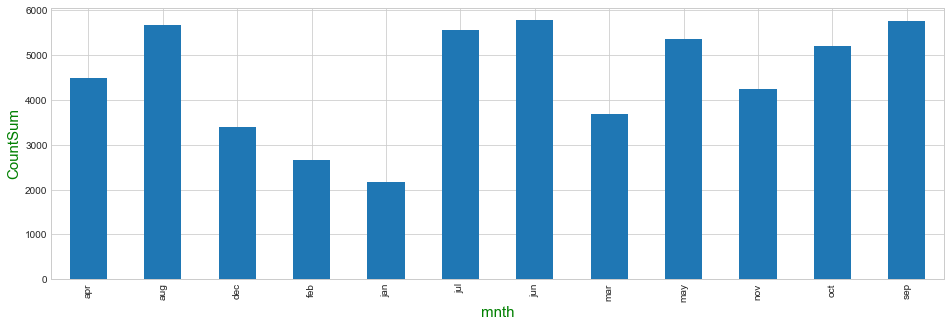

In [11]:
plt.figure(figsize=(16,5))

plt.xlabel('Months',fontdict={'color':'green','fontsize':15})
plt.ylabel('CountSum',fontdict={'color':'green','fontsize':15})
df.groupby('mnth')['cnt'].mean().plot.bar()
plt.show()

- __There is high cutomer count in the mid-year duration__

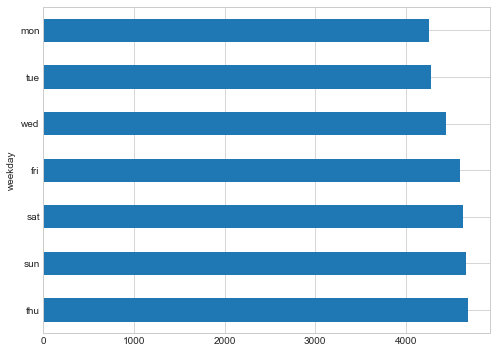

In [12]:
plt.figure(figsize=(8,6))
df.groupby('weekday')['cnt'].mean().sort_values(ascending=False).plot.barh()
plt.show()

- __It is clearly seen from the above graph that on thu and sun the Demand for bike sharing service is maximum__

In [13]:
# check the head of the dataframe
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2018,spring,0,jan,0,mon,1,Mist+Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02/01/2018,spring,0,jan,0,tue,1,Mist+Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03/01/2018,spring,0,jan,0,wed,1,Partly cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04/01/2018,spring,0,jan,0,thu,1,Partly cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05/01/2018,spring,0,jan,0,fri,1,Partly cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
# Drop the instant, dteday columns

df = df.drop(['instant','dteday'],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,jan,0,mon,1,Mist+Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,jan,0,tue,1,Mist+Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,jan,0,wed,1,Partly cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,jan,0,thu,1,Partly cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,jan,0,fri,1,Partly cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


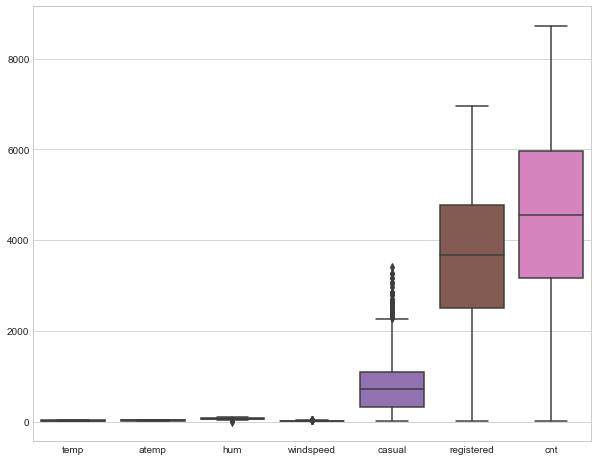

In [15]:
## Plot the boxplots of the numerical columns to check for the outliers
plt.figure(figsize=(10,8))
sns.boxplot(data=df[['temp','atemp','hum','windspeed','casual','registered','cnt']])
plt.show()

- __Inference-->   _There are no significant outliers seen__

<Figure size 1440x1440 with 0 Axes>

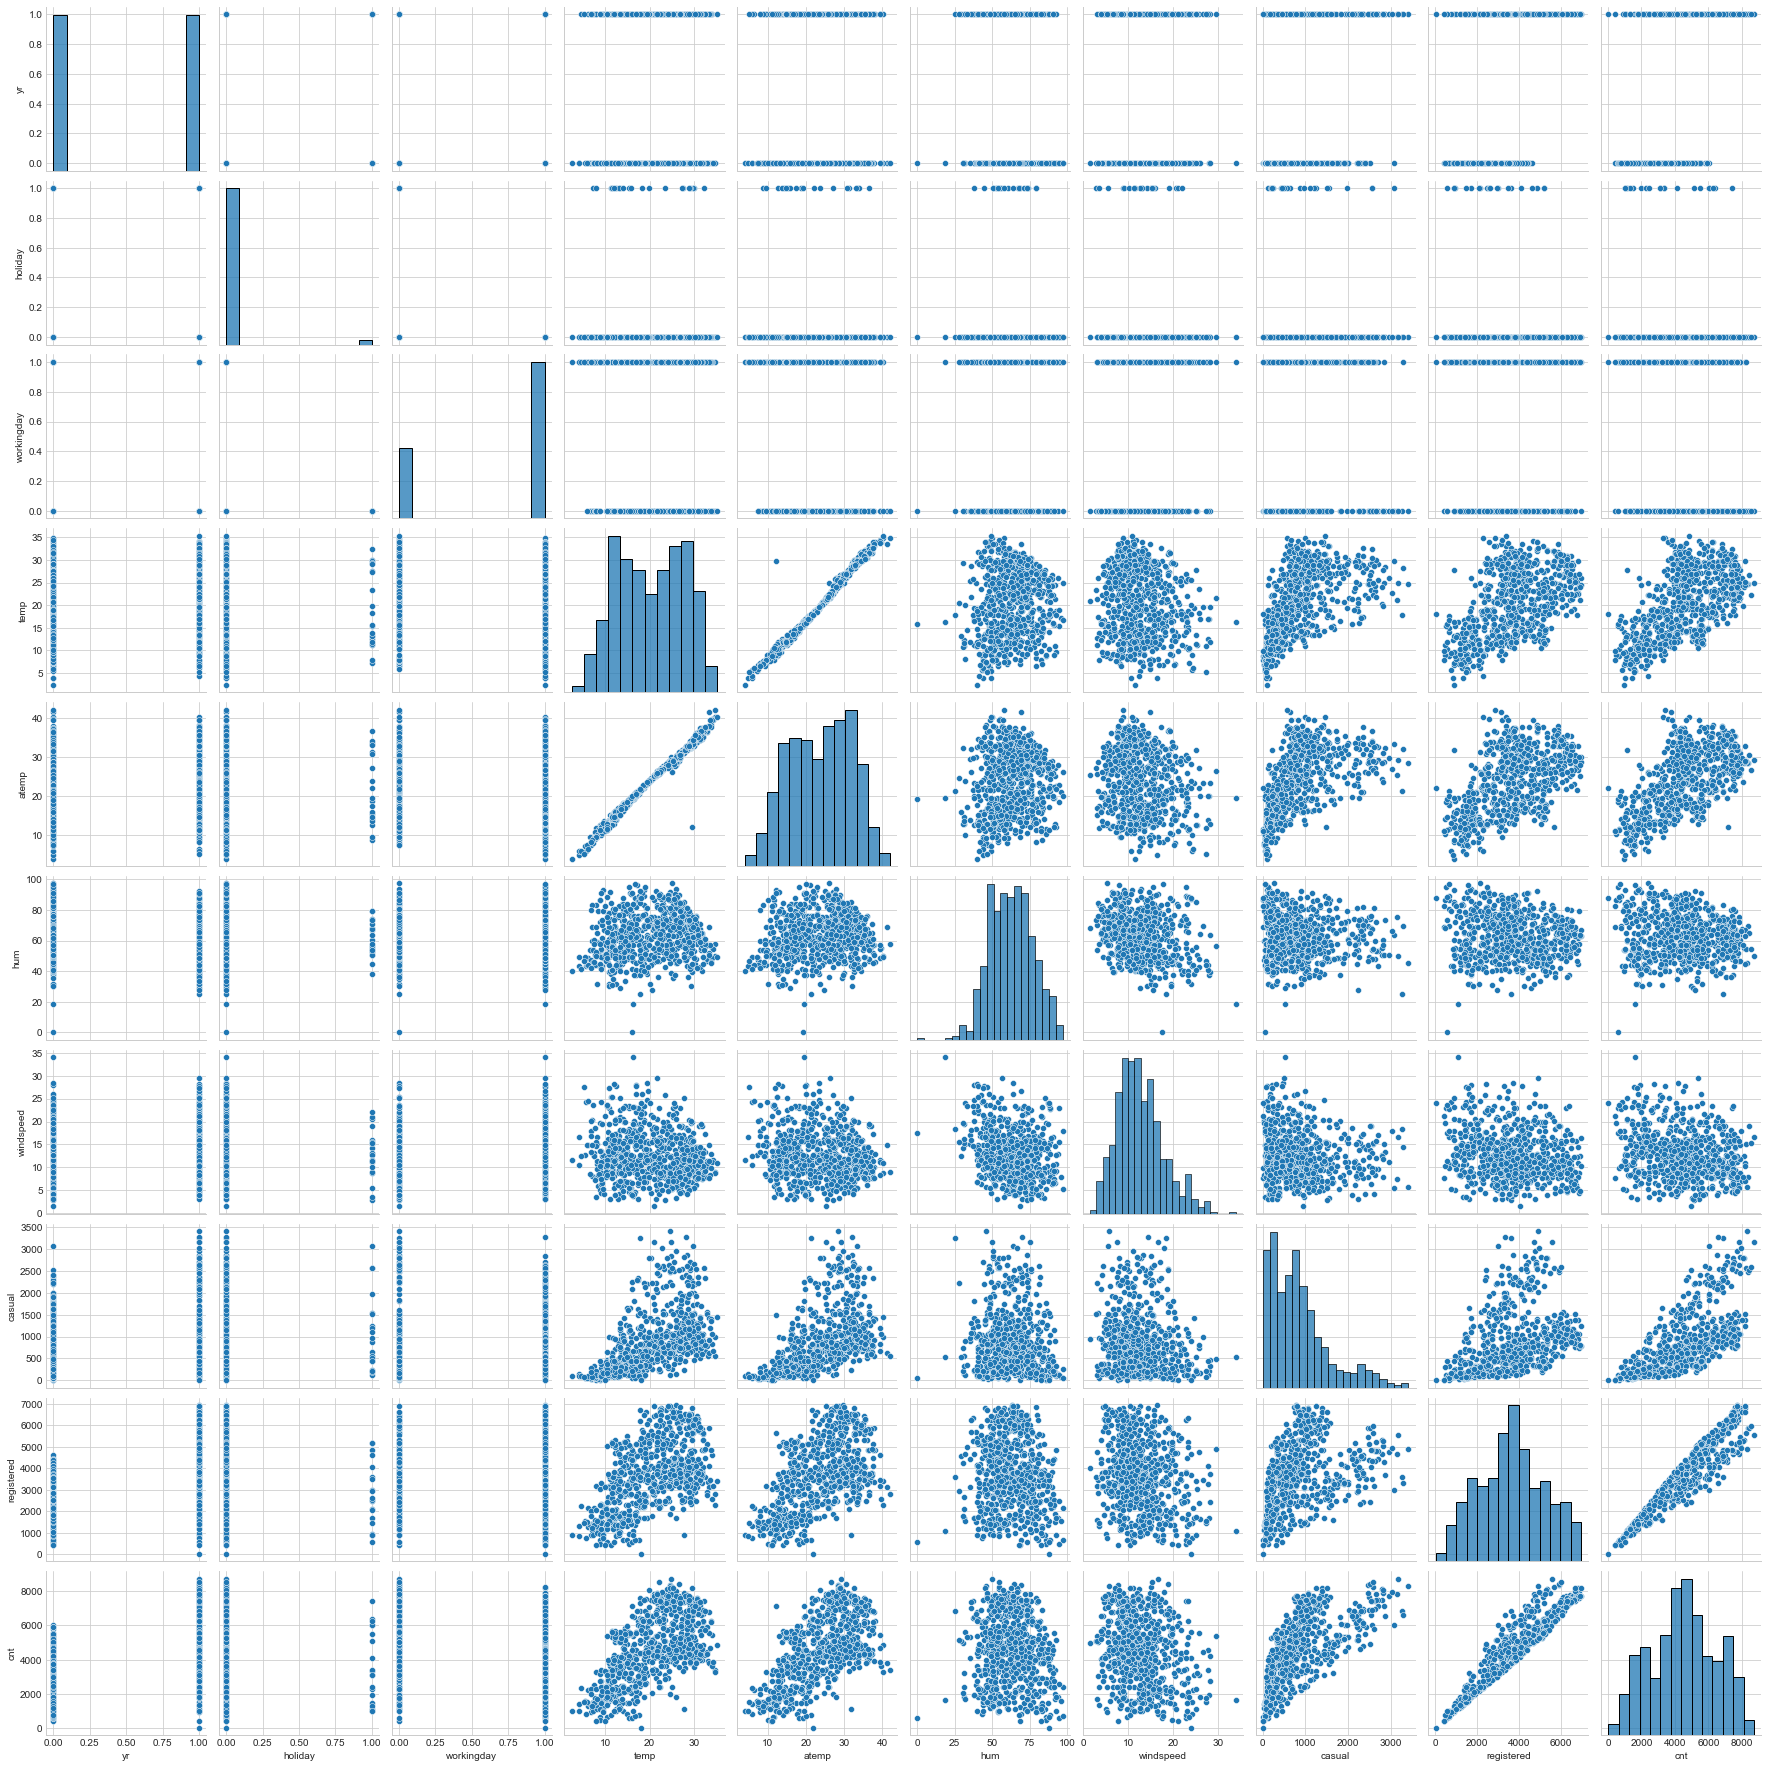

In [16]:
plt.figure(figsize=(20,20))
sns.pairplot(df)
plt.show()

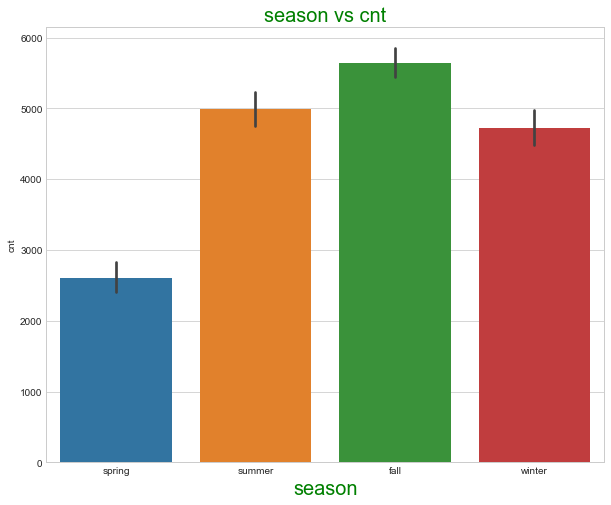

In [17]:
# Plotting the bar plot between season and count and between month and cnt to understand the pattern of demand in the respective 
# seasons and months
plt.figure(figsize=(10,8))

plt.title('season vs cnt',fontdict={'color':'green','fontsize':20})
plt.xlabel('Season',fontdict={'color':'green','fontsize':20})
sns.barplot(x=df['season'],y=df['cnt'])
plt.show()

- __Count of Customers is highest during the summer and fall seasons__

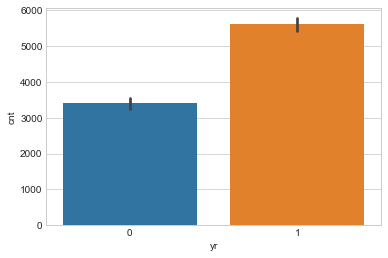

In [18]:
# Plotting the bar plot between "Year" and "Cnt" to check which year has higher demand 
# 0 - 2018
# 1 - 2019

sns.barplot(x=df['yr'],y=df['cnt'])
plt.show()

- __It is clear from the above graph that Demand is much higher in the Year 2019__
- __We can infer that trend of Bike sharing is increasing year by year__

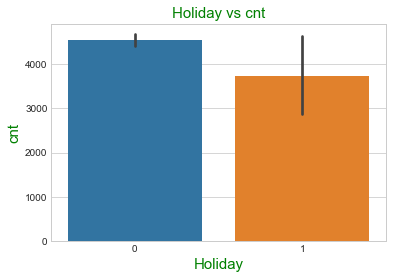

In [19]:
# Plotting barplot between "Holiday" and "Cnt"
sns.barplot(x=df['holiday'],y=df['cnt'])
plt.title('Holiday vs cnt',fontdict={'color':'green','fontsize':15})
plt.xlabel('Holiday',fontdict={'color':'green','fontsize':15})
plt.ylabel('cnt',fontdict={'color':'green','fontsize':15})
plt.show()

- __Demand for Bike Sharing was maximum on the working day because on working day count of people going to office or going out for daily work is more__

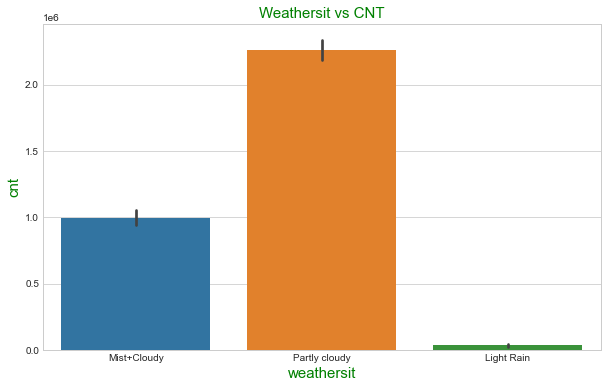

In [20]:
# Plotting bar graph between "cnt" and "weathersit" variables to check on what situations of weather the demand is max or min
plt.figure(figsize=(10,6))
plt.title('Weathersit vs CNT',fontdict={'color':'green','fontsize':15})
plt.xlabel('Weathersit',fontdict={'color':'green','fontsize':15})
plt.ylabel('CNT',fontdict={'color':'green','fontsize':15})
sns.barplot(x=df['weathersit'],y=df['cnt'],estimator=np.sum)
plt.show()

- __It is evident from the above graph that there is very little demand of Bike Sharing Services During the "Light Rain" weather situation. It was also expected because during rain people may go for taxi services or bus__

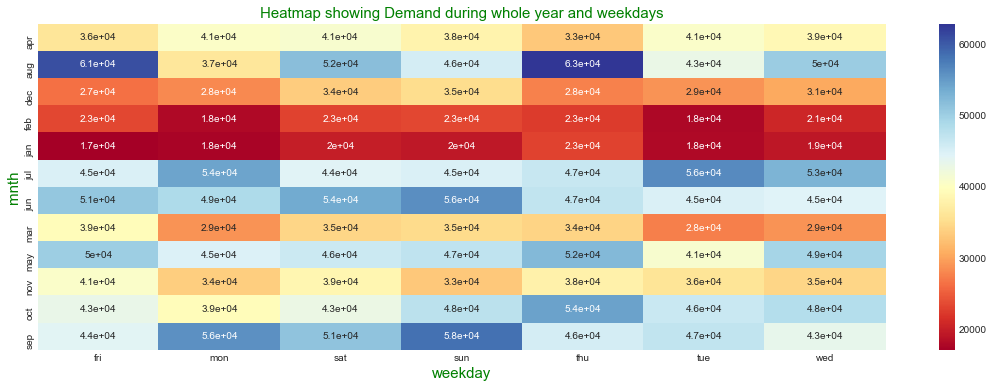

In [21]:
plt.figure(figsize=(19,6))
plt.title('Heatmap showing Demand during whole year and weekdays',fontdict={'color':'green','fontsize':15})
plt.xlabel('Weekdays',fontdict={'color':'green','fontsize':15})
plt.ylabel('Month',fontdict={'color':'green','fontsize':15})
sns.heatmap(pd.pivot_table(data=df,columns='weekday',index='mnth',values='cnt',aggfunc='sum'),cmap= 'RdYlBu',annot= True)
plt.show()

- __It is clear from the above heatmap that during the months: sep,oct,may,jun,jul,apr the demand for the Bike Sharing Services is always high i.ie, during the whole weak it is same__

- __Let's try to figure out that what is the effect of temperature and humidity on the demand of the Bike Sharing Service__

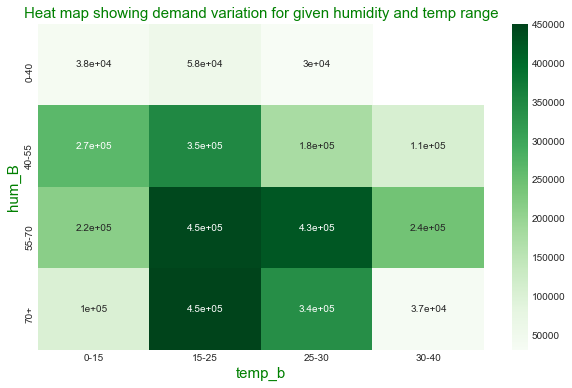

In [22]:
# Let's do Binning the temp variable
df['temp_b']= pd.cut(x= df['temp'],bins= [0,15,25,30,40,50],labels=['0-15','15-25','25-30','30-40','40+'])

# Binning the Humidity 
df['hum_B'] = pd.cut(x= df['hum'],bins= [0.0,40,55,70,100],labels=['0-40','40-55','55-70','70+'])

plt.figure(figsize=(10,6))
plt.title('Heat map showing demand variation for given humidity and temp range',fontdict={'color':'green','fontsize':15})
plt.xlabel('Temp Range',fontdict={'color':'green','fontsize':15})
plt.ylabel('Humidity Range',fontdict={'color':'green','fontsize':15})
sns.heatmap(pd.pivot_table(data= df,columns='temp_b',index='hum_B',values= 'cnt',aggfunc='sum'),cmap='Greens',annot= True)
plt.show()

- __It is clear from the above graph that customers are preferring Bike Sharing Services more during humidity range of 55-70 and temp range between 15-30__
- __It may be because people are not liking to go in crowdy buses during High humidity range and they prefer Bike Sharing Services__
- __Also at the temperature range of 30-40 and humidity range of 55-70 the demand of Bike sharing service is more which governs our above inference__

In [23]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_b,hum_B
0,spring,0,jan,0,mon,1,Mist+Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,0-15,70+
1,spring,0,jan,0,tue,1,Mist+Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,0-15,55-70
2,spring,0,jan,0,wed,1,Partly cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0-15,40-55
3,spring,0,jan,0,thu,1,Partly cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0-15,55-70
4,spring,0,jan,0,fri,1,Partly cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0-15,40-55


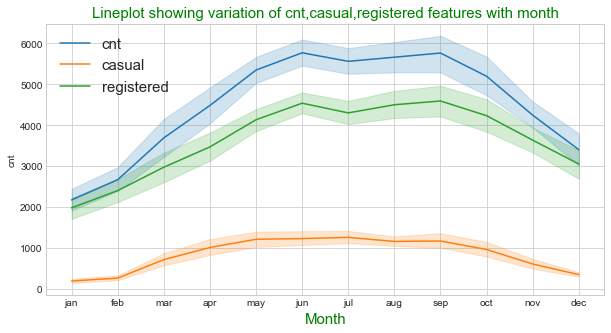

In [24]:
plt.figure(figsize=(10,5))
plt.title('Lineplot showing variation of cnt,casual,registered features with month',fontdict={'color':'green','fontsize':15})
plt.xlabel('Month',fontdict={'color':'green','fontsize':15})
sns.lineplot(x=df['mnth'],y=df['cnt'],label = 'cnt')
sns.lineplot(x= df['mnth'],y= df['casual'],label = 'casual')
sns.lineplot(x= df['mnth'],y= df['registered'],label = 'registered')

plt.legend(fontsize = 15)
plt.show()

+ __During months may-sep the demand is maximum__

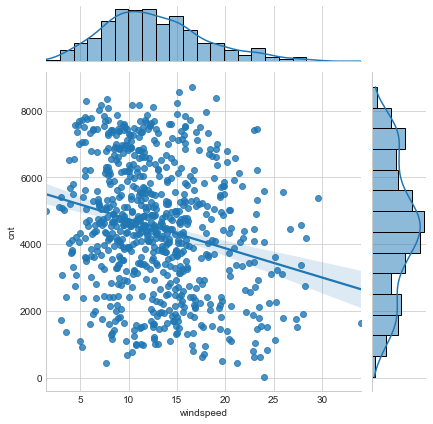

In [25]:
sns.jointplot(x= df['windspeed'],y= df['cnt'],kind='reg')

- __There is a negative correlaton between "cnt" and "windspeed" at higher windspeeds people may not be wishing to go by bikes__

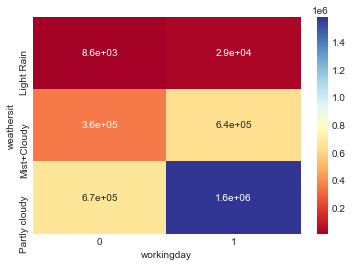

In [26]:
sns.heatmap(pd.pivot_table(data=df,columns='workingday',index='weathersit',values='cnt',aggfunc='sum'),cmap='RdYlBu',annot=True)
plt.show()

- __Either it working day or non-working day people are not prefering Bike Sharing service during Light Rain weather situation__
- __During the Working day people are prefering Bike Sharing Service more if it is Partly cloudy__

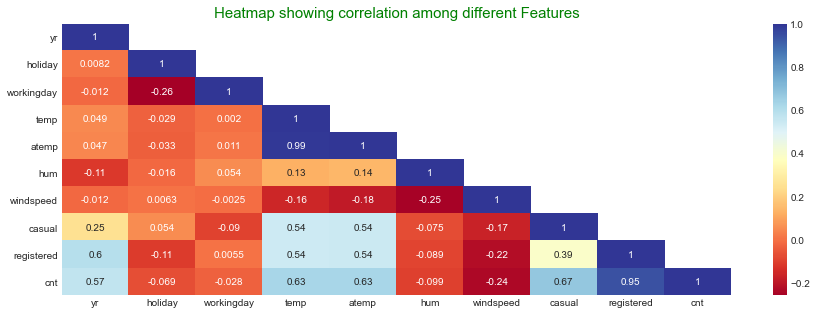

In [27]:
plt.figure(figsize=(15,5))
plt.title('Heatmap showing correlation among different Features',fontdict={'color':'green','fontsize':15})

cor = df.corr()
mask = np.array(cor)
mask[np.tril_indices_from(cor)] = False
sns.heatmap(cor,mask=mask,annot=True,cmap='RdYlBu')
plt.show()

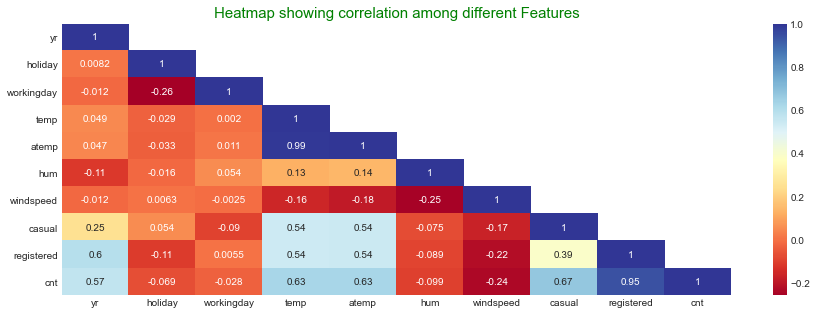

In [28]:
plt.figure(figsize=(15,5))
plt.title('Heatmap showing correlation among different Features',fontdict={'color':'green','fontsize':15})

cor = df.corr()
mask = np.array(cor)
mask[np.tril_indices_from(cor)] = False
sns.heatmap(cor,mask=mask,annot=True,cmap='RdYlBu')
plt.show()

- __cnt has high Positive correlation with temp variable and atemp variable__
- __There is significantly high negative correlation seen between "cnt" and "windspeed" and "humidity"__
- __cnt has high positive correlation with yr__

---

# Preparing the dataset for Model Building

In [29]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_b,hum_B
0,spring,0,jan,0,mon,1,Mist+Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,0-15,70+
1,spring,0,jan,0,tue,1,Mist+Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,0-15,55-70
2,spring,0,jan,0,wed,1,Partly cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0-15,40-55
3,spring,0,jan,0,thu,1,Partly cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0-15,55-70
4,spring,0,jan,0,fri,1,Partly cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0-15,40-55


In [30]:
# Dropping the "temp_b","hum_B",columns
df = df.drop(['temp_b','hum_B'],axis=1)

# Creating dummy for 'season','mnth','weekday','weathersit' variable
season = pd.get_dummies(df['season'],drop_first=True)
month = pd.get_dummies(df['mnth'],drop_first=True)
weekday = pd.get_dummies(df['weekday'],drop_first=True)
weathersit = pd.get_dummies(df['weathersit'],drop_first=True)
# Concatenating the 'season','month','weekday','weathersit' dataframes with df
df = pd.concat([df,season],axis=1)
df = pd.concat([df,month],axis=1)
df = pd.concat([df,weekday],axis=1)
df = pd.concat([df,weathersit],axis=1)
df = df.drop('season',axis=1)
df = df.drop('mnth',axis=1)
df = df.drop('weekday',axis=1)
df = df.drop('weathersit',axis=1)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,oct,sep,mon,sat,sun,thu,tue,wed,Mist+Cloudy,Partly cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,1,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,1,0,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,0,0,1


- Since we know that :
    - $cnt$ $=$ $casual$ $+$ $registered$
- _So it would be better to drop the "casual" and "registered" users because keeping all of them together would led to high $multicollinearity$_
- Our Target variable is CNT

In [31]:
df = df.drop(['casual','registered'],axis= 1)

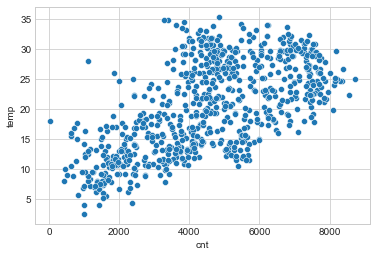

In [32]:
sns.scatterplot(data=df,x='cnt',y='temp')
plt.show()

- __The above scatterplot shows that there is some linear relationship between 'temp' and 'cnt' variable__

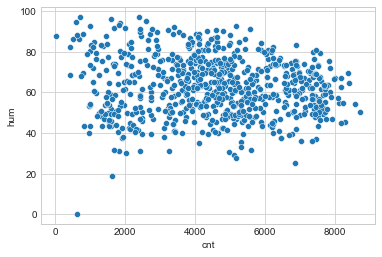

In [33]:
sns.scatterplot(data=df,x='cnt',y='hum')
plt.show()

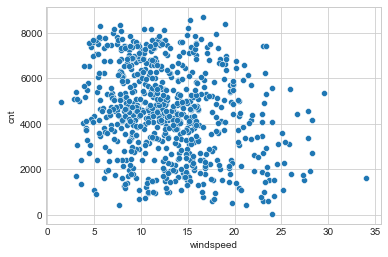

In [34]:
sns.scatterplot(data=df,x='windspeed',y='cnt')
plt.show()

- __At lower windspeeds there are higher instances of 'cnt' where at higher windspeeds there are low instances of 'cnt'__

### Splitting the dataset into `Train and Test`

In [35]:
df_train,df_test = train_test_split(df,test_size = 0.3,random_state= 101)

### Scaling the Features
- Using the standard scaler for scaling the data

- $ (X - mean)/ StandardDeviation $

In [36]:
scaler= StandardScaler()

In [37]:
numvar = ['temp','atemp','hum','windspeed','cnt']
df_train[numvar] = scaler.fit_transform(df_train[numvar])

In [38]:
### X_train is dataset of all the independent variables
### y_train is the series of 'cnt' variable
y_train = df_train.pop('cnt')
X_train = df_train

# Have a look at the y_train
y_train.head()

53    -1.332843
117   -0.228757
712    0.572105
60    -1.220939
72    -1.266320
Name: cnt, dtype: float64

In [39]:
# Have a look at the X_train 
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,Mist+Cloudy,Partly cloudy
53,0,0,1,-1.486316,-1.402119,-1.441098,-1.195663,1,0,0,...,0,0,0,0,0,0,0,0,0,1
117,0,0,0,0.668693,0.641331,0.530039,1.679402,0,1,0,...,0,0,0,1,0,0,0,0,1,0
712,1,0,0,-1.159994,-1.104842,0.119080,-0.725146,0,0,1,...,0,0,0,1,0,0,0,0,0,1
60,0,0,1,-0.869584,-0.946137,-1.252776,1.513651,1,0,0,...,0,0,0,0,0,0,0,0,0,1
72,0,0,1,-0.922854,-0.872981,-0.916621,-0.652926,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [40]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,Mist+Cloudy,Partly cloudy
count,511.000000,511.000000,511.000000,5.110000e+02,5.110000e+02,5.110000e+02,5.110000e+02,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.510763,0.027397,0.686888,3.096023e-16,5.366440e-17,5.996508e-17,-2.172648e-19,0.254403,0.252446,0.240705,...,0.084149,0.082192,0.148728,0.154599,0.135029,0.146771,0.146771,0.133072,0.326810,0.643836
std,0.500374,0.163398,0.464214,1.000980e+00,1.000980e+00,1.000980e+00,1.000980e+00,0.435952,0.434842,0.427930,...,0.277883,0.274926,0.356169,0.361876,0.342090,0.354224,0.354224,0.339986,0.469507,0.479334
min,0.000000,0.000000,0.000000,-2.371757e+00,-2.424098e+00,-3.109502e+00,-2.104869e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-8.673158e-01,-8.358517e-01,-7.457222e-01,-7.212353e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,-5.733531e-02,-9.158173e-03,2.151289e-02,-1.496641e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,8.728894e-01,8.233030e-01,7.266528e-01,5.677171e-01,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.998238e+00,2.247865e+00,2.442949e+00,4.044347e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- __Above description shows that the scalling process ran well__

## Since there are large number of columns and wee need to the most relevant columns for our dataset so it would be better to use `Recursive Feature Elimination` or `RFE` technique

__To use RFE technique first we need to make our model with sklearn because RFE comes with sklearn__

- Selecting top 15 columns

In [41]:
lm = LinearRegression()
lm = lm.fit(X_train,y_train)
## Using RFE
rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 8),
 ('atemp', True, 1),
 ('hum', False, 4),
 ('windspeed', False, 5),
 ('spring', True, 1),
 ('summer', False, 9),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 15),
 ('mar', False, 7),
 ('may', False, 3),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', False, 2),
 ('mon', False, 11),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 14),
 ('tue', False, 6),
 ('wed', False, 12),
 ('Mist+Cloudy', True, 1),
 ('Partly cloudy', True, 1)]

In [43]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'atemp', 'spring', 'winter', 'dec',
       'feb', 'jan', 'jul', 'nov', 'sat', 'sun', 'Mist+Cloudy',
       'Partly cloudy'],
      dtype='object')

In [44]:
X_train = X_train[X_train.columns[rfe.support_]]
X_train.shape

(511, 15)

__We have got our top 15 most relevant features so now we can go for Model Building using `statsmodels`__

### Model: 1

In [45]:
# adding constants
X_train_sm = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     149.2
Date:                Fri, 12 Mar 2021   Prob (F-statistic):          1.26e-172
Time:                        19:32:20   Log-Likelihood:                -288.50
No. Observations:                 511   AIC:                             609.0
Df Residuals:                     495   BIC:                             676.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.2049      0.357     -3.378      0.001      -1.906      -0.504
yr                1.0579      0.039     27.312      0.000       0.982       1.134
holiday          -0.8066      0.311     -2.591      0.010      -1.418      -0.195
workingday       -0.4104      0.337     -1.218      0.224      -1.072       0.251
atemp             0.4215      0.036     11.824      0.000       0.351       0.492
spring           -0.4392      0.084     -5.200      0.000      -0.605      -0.273
winter            0.3728      0.066      5.673      0.000       0.244       0.502
dec              -0.3475      0.085     -4.077      0.000      -0.515      -0.180
feb              -0.2238      0.099     -2.258      0.024      -0.418      -0.029
jan              -0.2746      0.100     -2.754      0.006      -0.471      -0.079
jul              -0.2676      0.078     -3.414      0.001      -0.422      -0.114
nov              -0.3596      0.094     -3.840      0.000      -0.544      -0.176
sat              -0.3368      0.336     -1.004      0.316      -0.996       0.323
sun              -0.2827      0.335     -0.843      0.400      -0.942       0.376
Mist+Cloudy       1.0011      0.118      8.489      0.000       0.769       1.233
Partly cloudy     1.3583      0.116     11.729      0.000       1.131       1.586
==============================================================================
Omnibus:                      103.308   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              289.780
Skew:                          -0.975   Prob(JB):                     1.19e-63
Kurtosis:                       6.132   Cond. No.                         60.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking the VIF values for the columns 
- __VIF = $1$ / $(1-R**2)$__
- __VIF shows the multicollinearity between the features which is not preferred. Generally VIF of less than 5 is more preferrable__

In [46]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif

,Features,VIF
0,yr,2.076825
1,holiday,1.722412
2,workingday,22.813603
3,atemp,3.450124
4,spring,4.925766
5,winter,2.821186
6,dec,1.706411
7,feb,2.099269
8,jan,2.388701
9,jul,1.413426


- __Dropping the SUN column due to high p value__

In [47]:
X_train = X_train.drop('sun',axis=1)

## Model: 2

In [48]:
# adding constants
X_train_sm = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     159.9
Date:                Fri, 12 Mar 2021   Prob (F-statistic):          1.39e-173
Time:                        19:32:20   Log-Likelihood:                -288.86
No. Observations:                 511   AIC:                             607.7
Df Residuals:                     496   BIC:                             671.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.4855      0.128    -11.594      0.000      -1.737      -1.234
yr                1.0597      0.039     27.415      0.000       0.984       1.136
holiday          -0.5669      0.127     -4.472      0.000      -0.816      -0.318
workingday       -0.1306      0.057     -2.277      0.023      -0.243      -0.018
atemp             0.4233      0.036     11.899      0.000       0.353       0.493
spring           -0.4362      0.084     -5.171      0.000      -0.602      -0.270
winter            0.3742      0.066      5.698      0.000       0.245       0.503
dec              -0.3455      0.085     -4.057      0.000      -0.513      -0.178
feb              -0.2213      0.099     -2.235      0.026      -0.416      -0.027
jan              -0.2708      0.100     -2.719      0.007      -0.467      -0.075
jul              -0.2687      0.078     -3.429      0.001      -0.423      -0.115
nov              -0.3634      0.093     -3.887      0.000      -0.547      -0.180
sat              -0.0604      0.071     -0.847      0.397      -0.200       0.080
Mist+Cloudy       1.0003      0.118      8.485      0.000       0.769       1.232
Partly cloudy     1.3566      0.116     11.719      0.000       1.129       1.584
==============================================================================
Omnibus:                      102.829   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.700
Skew:                          -0.972   Prob(JB):                     5.54e-63
Kurtosis:                       6.112   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif

,Features,VIF
0,yr,2.064648
1,holiday,1.179262
2,workingday,5.124233
3,atemp,3.443408
4,spring,4.874621
5,winter,2.759757
6,dec,1.704956
7,feb,2.099261
8,jan,2.388683
9,jul,1.406440


- __Dropping the sat column due to high p value__

In [50]:
X_train = X_train.drop('sat',axis=1)

In [51]:
# adding constants
X_train_sm = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     172.3
Date:                Fri, 12 Mar 2021   Prob (F-statistic):          1.48e-174
Time:                        19:32:20   Log-Likelihood:                -289.23
No. Observations:                 511   AIC:                             606.5
Df Residuals:                     497   BIC:                             665.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.5174      0.122    -12.391      0.000      -1.758      -1.277
yr                1.0617      0.039     27.525      0.000       0.986       1.138
holiday          -0.5382      0.122     -4.407      0.000      -0.778      -0.298
workingday       -0.0983      0.043     -2.294      0.022      -0.183      -0.014
atemp             0.4214      0.035     11.873      0.000       0.352       0.491
spring           -0.4366      0.084     -5.177      0.000      -0.602      -0.271
winter            0.3745      0.066      5.704      0.000       0.245       0.503
dec              -0.3474      0.085     -4.082      0.000      -0.515      -0.180
feb              -0.2248      0.099     -2.272      0.023      -0.419      -0.030
jan              -0.2746      0.099     -2.761      0.006      -0.470      -0.079
jul              -0.2659      0.078     -3.397      0.001      -0.420      -0.112
nov              -0.3695      0.093     -3.965      0.000      -0.553      -0.186
Mist+Cloudy       0.9996      0.118      8.481      0.000       0.768       1.231
Partly cloudy     1.3562      0.116     11.719      0.000       1.129       1.584
==============================================================================
Omnibus:                      101.199   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              281.208
Skew:                          -0.959   Prob(JB):                     8.64e-62
Kurtosis:                       6.087   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif

,Features,VIF
0,yr,2.062569
1,holiday,1.112527
2,workingday,3.127914
3,atemp,3.417384
4,spring,4.865121
5,winter,2.753863
6,dec,1.702097
7,feb,2.094822
8,jan,2.382433
9,jul,1.405703


In [53]:
X_train = X_train.drop('workingday',axis=1)

In [54]:
# adding constants
X_train_sm = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     184.6
Date:                Fri, 12 Mar 2021   Prob (F-statistic):          1.44e-174
Time:                        19:32:20   Log-Likelihood:                -291.92
No. Observations:                 511   AIC:                             609.8
Df Residuals:                     498   BIC:                             664.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.6035      0.117    -13.699      0.000      -1.833      -1.374
yr                1.0629      0.039     27.440      0.000       0.987       1.139
holiday          -0.4682      0.119     -3.943      0.000      -0.702      -0.235
atemp             0.4251      0.036     11.938      0.000       0.355       0.495
spring           -0.4298      0.085     -5.078      0.000      -0.596      -0.264
winter            0.3768      0.066      5.716      0.000       0.247       0.506
dec              -0.3379      0.085     -3.959      0.000      -0.506      -0.170
feb              -0.2230      0.099     -2.245      0.025      -0.418      -0.028
jan              -0.2748      0.100     -2.751      0.006      -0.471      -0.079
jul              -0.2716      0.079     -3.457      0.001      -0.426      -0.117
nov              -0.3754      0.094     -4.013      0.000      -0.559      -0.192
Mist+Cloudy       1.0165      0.118      8.605      0.000       0.784       1.249
Partly cloudy     1.3690      0.116     11.794      0.000       1.141       1.597
==============================================================================
Omnibus:                       95.480   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              272.904
Skew:                          -0.896   Prob(JB):                     5.49e-60
Kurtosis:                       6.100   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif

,Features,VIF
0,yr,2.062063
1,holiday,1.048260
2,atemp,3.416306
3,spring,4.864961
4,winter,2.749391
5,dec,1.700112
6,feb,2.094820
7,jan,2.382183
8,jul,1.401799
9,nov,1.759033


#### dropping spring feature due to slightly higher VIF

In [56]:
X_train= X_train.drop('spring',axis=1)

In [57]:
# adding constants
X_train_sm = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     189.6
Date:                Fri, 12 Mar 2021   Prob (F-statistic):          2.78e-170
Time:                        19:32:20   Log-Likelihood:                -304.82
No. Observations:                 511   AIC:                             633.6
Df Residuals:                     499   BIC:                             684.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.6794      0.119    -14.119      0.000      -1.913      -1.446
yr                1.0515      0.040     26.541      0.000       0.974       1.129
holiday          -0.4665      0.122     -3.834      0.000      -0.706      -0.227
atemp             0.5092      0.032     15.771      0.000       0.446       0.573
winter            0.5158      0.061      8.394      0.000       0.395       0.637
dec              -0.3853      0.087     -4.432      0.000      -0.556      -0.214
feb              -0.4588      0.090     -5.099      0.000      -0.636      -0.282
jan              -0.4835      0.093     -5.183      0.000      -0.667      -0.300
jul              -0.2826      0.080     -3.512      0.000      -0.441      -0.124
nov              -0.3565      0.096     -3.722      0.000      -0.545      -0.168
Mist+Cloudy       1.0077      0.121      8.328      0.000       0.770       1.245
Partly cloudy     1.3413      0.119     11.291      0.000       1.108       1.575
==============================================================================
Omnibus:                       82.618   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.501
Skew:                          -0.846   Prob(JB):                     1.58e-42
Kurtosis:                       5.486   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif

,Features,VIF
0,yr,2.051846
1,holiday,1.048246
2,atemp,2.693135
3,winter,2.304729
4,dec,1.677512
5,feb,1.624183
6,jan,1.964109
7,jul,1.399857
8,nov,1.757217
9,Mist+Cloudy,1.682210


In [59]:
X_train= X_train.drop('Mist+Cloudy',axis=1)

In [60]:
# adding constants
X_train_sm = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_sm).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     177.4
Date:                Fri, 12 Mar 2021   Prob (F-statistic):          2.20e-157
Time:                        19:32:20   Log-Likelihood:                -338.07
No. Observations:                 511   AIC:                             698.1
Df Residuals:                     500   BIC:                             744.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.7587      0.047    -16.225      0.000      -0.851      -0.667
yr                1.0724      0.042     25.439      0.000       0.990       1.155
holiday          -0.4530      0.130     -3.492      0.001      -0.708      -0.198
atemp             0.5230      0.034     15.213      0.000       0.455       0.591
winter            0.5010      0.065      7.651      0.000       0.372       0.630
dec              -0.3770      0.093     -4.067      0.000      -0.559      -0.195
feb              -0.4572      0.096     -4.766      0.000      -0.646      -0.269
jan              -0.4620      0.099     -4.647      0.000      -0.657      -0.267
jul              -0.3223      0.086     -3.764      0.000      -0.491      -0.154
nov              -0.3943      0.102     -3.865      0.000      -0.595      -0.194
Partly cloudy     0.4165      0.045      9.260      0.000       0.328       0.505
==============================================================================
Omnibus:                      133.175   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              500.120
Skew:                          -1.146   Prob(JB):                    2.51e-109
Kurtosis:                       7.270   Cond. No.                         9.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif

,Features,VIF
0,yr,1.682766
1,holiday,1.047856
2,atemp,2.577441
3,winter,2.135489
4,dec,1.630545
5,feb,1.531942
6,jan,1.777670
7,jul,1.398304
8,nov,1.756587
9,Partly cloudy,2.001930


## - This model looks statistically sound since all the p-values < 0.05 and all the VIF < 5

---

## Residual analysis

In [62]:
y_train_pred = lm.predict(X_train_sm)
res = y_train-y_train_pred

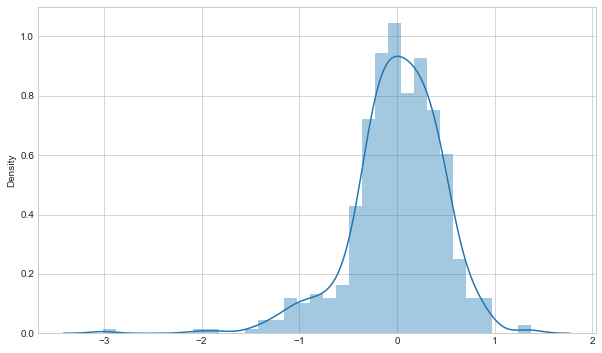

In [63]:
plt.figure(figsize=(10,6))
sns.distplot(res)
plt.show()

- __The residual terms are `Normally Distributed` and `mean is zero` so the assumption of the Linear Regression is satisfied__

<AxesSubplot:>

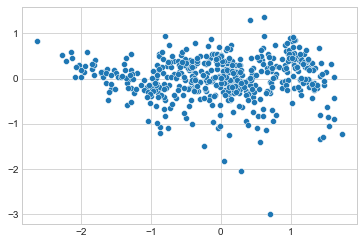

In [64]:
sns.scatterplot(y_train_pred,res)

- __No visible pattern is seen so another assumption of linear regression is satisfied__

### Prediction on the test data

- __Scalling the test data__

In [65]:
df_test[numvar] = scaler.transform(df_test[numvar])

In [66]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Mist+Cloudy,Partly cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.474886,0.031963,0.698630,0.016249,0.003579,0.035870,0.087503,0.011018,0.228311,0.251142,...,0.086758,0.082192,0.132420,0.114155,0.159817,0.132420,0.136986,0.164384,0.360731,0.611872
std,0.500513,0.176306,0.459904,0.989744,0.998820,1.033501,0.939417,0.994517,0.420705,0.434663,...,0.282125,0.275286,0.339723,0.318728,0.367276,0.339723,0.344621,0.371472,0.481313,0.488440
min,0.000000,0.000000,0.000000,-2.163417,-2.196546,-4.442920,-1.797348,-2.009425,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-0.831012,-0.868161,-0.756068,-0.563541,-0.788278,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.106022,0.176585,-0.040575,0.005172,0.065700,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.877425,0.827163,0.763611,0.570430,0.781732,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.871180,2.158789,2.457729,3.208937,2.172282,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
y_test = df_test.pop('cnt')

In [68]:
### Removing the columns which are not present in the final model
X_test = df_test[X_train.columns]
X_test.head()

,yr,holiday,atemp,winter,dec,feb,jan,jul,nov,Partly cloudy
299,0,0,-0.106127,1,0,0,0,0,0,0
723,1,1,-1.103168,0,1,0,0,0,0,0
647,1,0,0.176561,1,0,0,0,0,0,1
520,1,0,0.316077,0,0,0,0,0,0,0
114,0,0,0.614170,0,0,0,0,0,0,1


In [69]:
## adding constants to X_test
X_test_sm = sm.add_constant(X_test)

## Making prediction
y_test_pred = lm.predict(X_test_sm)

## Checking the R-Squared

r2 = r2_score(y_true=y_test,y_pred=y_test_pred)
r2

0.8078769074056413

In [70]:
print('The R-Squared for Model: {}'.format(lm.rsquared))
print('The R-Squared for Test Data: {}'.format(r2))

The R-Squared for Model: 0.7801278339221216
The R-Squared for Test Data: 0.8078769074056413


- __R-squared value for the test data is nearer to model__

---

## Model Evaluation

<AxesSubplot:xlabel='cnt'>

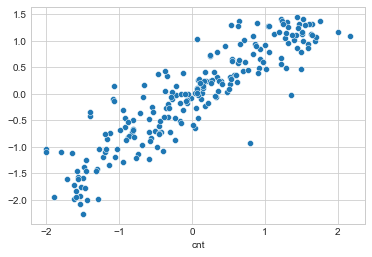

In [71]:
sns.scatterplot(y_test,y_test_pred)

- __There is linear relationship seen between the test data and predicted data__

## Final equation of our best fit line is

$ CNT= [1.07*yr] -[0.45*holiday] + [0.52*atemp] + [0.5*winter] - [0.37*dec] - [0.45*feb] - [0.46*jan] - [0.32*jul] -[0.39*nov] + [0.4165* Partly cloudy] $

- __Making Inferences from our model__

##### All the inferences for any particular Features are made by considering other variables as Constant

- `Year` has Strong +ve Coefficient which indicates that there could be increase in the demand of Shared Bikes Year by Year if year increases by 1 than there is increase in demand by 1.07 units.
- During `Holidays` the Bike Sharing Service's customers counts is less if there is holiday than there is decrease in the demand by 0.45 unit it may be because of the reason that there are less people going to the offices
- High Positive coefficient for the `atemp` variable which indicates that there may be more no. of people preferring Bikes rather than Crowdy Buses during hot days.If there is 1 unit increase in the temperature than there is 0.52 unit increase in the count
- `dec` has negative coefficient which indicates that there is drop in the count of customers during the month of december

---